In [1]:
!pip install pandas

In [2]:
!pip install seaborn

In [3]:
!pip install numpy

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("../data/raw/BC_A&A_with_ATD.csv")

In [11]:
df.head(5)

,region,territory,country_name,workflow_uuid,driver_uuid,delivery_trip_uuid,courier_flow,restaurant_offered_timestamp_utc,order_final_state_timestamp_local,eater_request_timestamp_local,geo_archetype,merchant_surface,pickup_distance,dropoff_distance,ATD
0,Mexico,South East,Mexico,8c393c94-9282-41a6-a885-7a6e84b470d7,d16e401c-795d-4295-96c0-85ca08ad8c42,715f96aa-0a31-46f6-b856-6ea6f87affad,Motorbike,2025-04-06 19:35:50.000,2025-04-06 13:48:48,2025-04-06 13:35:50,Drive momentum,Tablet,0.643,1.651,12.966667
1,Mexico,South East,Mexico,b156dd16-274f-46d1-ac6f-4c24ca43df69,06299354-23ec-4173-83dc-d6bd32a420e1,ac985454-0e6f-4695-a68b-755c60c2afd7,Motorbike,2025-04-11 22:30:56.000,2025-04-11 16:47:48,2025-04-11 16:30:56,Drive momentum,Tablet,0.812,1.733,16.866667
2,Mexico,South East,Mexico,87a8081b-b735-4daf-8452-3943a9d9ca24,188214a6-3813-44d5-9694-0ae69dfdd7e5,14b274b9-924e-4da7-8803-69558a33559d,Motorbike,2025-04-06 23:15:05.000,2025-04-06 17:34:49,2025-04-06 17:15:05,Drive momentum,Tablet,1.966,1.605,19.733333
3,Mexico,South East,Mexico,78f0e92c-fa45-4215-8c3f-703b8691b6eb,5c7cbb34-116b-4665-aaf3-7f02394c0ff8,ee4faf69-bfff-421a-a163-29dfa4156fc4,Motorbike,2025-04-19 02:38:58.000,2025-04-18 21:21:55,2025-04-18 20:38:58,Drive momentum,Tablet,3.01,4.771,42.950000
4,Mexico,Central,Mexico,e0b2324b-f210-4e6b-82d1-979f9a208967,8b7a3bd8-9cf1-493e-9c64-303db8781045,7870b275-4541-4e09-8fe7-a47e7b506ce4,Motorbike,2025-03-03 03:33:40.000,2025-03-02 22:02:36,2025-03-02 21:33:40,Play offense,Tablet,0.746,4.37,28.933333


In [7]:
print("dataset shape:", df.shape)

dataset shape: (1000000, 15)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   region                             1000000 non-null  object 
 1   territory                          1000000 non-null  object 
 2   country_name                       1000000 non-null  object 
 3   workflow_uuid                      1000000 non-null  object 
 4   driver_uuid                        1000000 non-null  object 
 5   delivery_trip_uuid                 1000000 non-null  object 
 6   courier_flow                       1000000 non-null  object 
 7   restaurant_offered_timestamp_utc   1000000 non-null  object 
 8   order_final_state_timestamp_local  1000000 non-null  object 
 9   eater_request_timestamp_local      1000000 non-null  object 
 10  geo_archetype                      1000000 non-null  object 
 11  merchant_surface         

Observations: 

* There are not any null values
* the only numerical value is ATD. The rest of the metrics are null
* At quicksight we need to convert some dates as object to timestamp and the distances need to be converted to float

In [11]:
df.describe(include='object')

,region,territory,country_name,workflow_uuid,driver_uuid,delivery_trip_uuid,courier_flow,restaurant_offered_timestamp_utc,order_final_state_timestamp_local,eater_request_timestamp_local,geo_archetype,merchant_surface,pickup_distance,dropoff_distance
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,1,5,1,997733,91214,999998,8,835092,838063,837173,6,5,10816,19593
top,Mexico,Central,Mexico,1aed4451-8f91-4fed-9077-5c6b1b9825cf,\N,4d3c5932-877d-494e-8e5e-4020f95f12c7,Motorbike,\N,2025-03-01 15:07:18,2025-04-26 16:23:06,Drive momentum,POS,0,0
freq,1000000,376000,1000000,4,12550,2,829312,165,7,7,347075,456767,67912,28733


In [9]:
df.region.unique()

array(['Mexico'], dtype=object)

In [12]:
df.territory.unique()

array(['South East', 'Central', 'North', 'Long Tail - Region', 'West'],
      dtype=object)

In [13]:
df.courier_flow.unique()

array(['Motorbike', 'UberEats', 'Logistics', 'UberX', '\\N', 'Fleet',
       'SUV', 'Onboarder'], dtype=object)

In [14]:
df.geo_archetype.unique()

array(['Drive momentum', 'Play offense', 'Build experience', 'Defend CP',
       'Unspecified', 'Unlaunched'], dtype=object)

In [15]:
df.merchant_surface	.unique()

array(['Tablet', 'POS', 'Web/Mobile', 'Other', 'Unspecified'],
      dtype=object)

Observations:

* We have data only for Mexico
* There seems to be a kind on null data in some columns marked as "\N"


In [18]:
# Duplicados
print("Duplicados:", df.duplicated().sum())

Duplicados: 2


In [19]:
# Check for "\N" values in categorical columns
null_like = {}

for col in df.select_dtypes(include='object'):
    count = (df[col] == "\\N").sum()
    if count > 0:
        null_like[col] = count

# Display columns and counts
for col, count in null_like.items():
    print(f"Column '{col}' contains {count} '\\N' values.")


Column 'driver_uuid' contains 12550 '\N' values.
Column 'courier_flow' contains 7549 '\N' values.
Column 'restaurant_offered_timestamp_utc' contains 165 '\N' values.
Column 'pickup_distance' contains 12847 '\N' values.
Column 'dropoff_distance' contains 12847 '\N' values.


In [20]:
# Filter rows where at least one column has a "\N" value
rows_with_null_like = df[df.apply(lambda row: row.astype(str).str.contains(r'\\N').any(), axis=1)]

# Show the first few rows
rows_with_null_like.head()

,region,territory,country_name,workflow_uuid,driver_uuid,delivery_trip_uuid,courier_flow,restaurant_offered_timestamp_utc,order_final_state_timestamp_local,eater_request_timestamp_local,geo_archetype,merchant_surface,pickup_distance,dropoff_distance,ATD
340,Mexico,North,Mexico,28598fc1-b1c8-4dad-b0d7-05e3425c60fe,\N,50b91d2b-1834-4d62-a3b9-788efdc047ec,\N,2025-03-14 04:26:52.000,2025-03-13 22:28:36,2025-03-13 22:26:51,Play offense,Web/Mobile,\N,\N,1.750000
371,Mexico,Central,Mexico,149476a6-0980-4f98-920b-025819d96af7,\N,a54d1ded-4e78-4561-9ae6-eb6a4cf8850f,\N,2025-04-22 03:08:10.000,2025-04-21 21:15:47,2025-04-21 21:08:10,Defend CP,POS,0.038,3.469,7.616667
515,Mexico,Central,Mexico,7ae5e248-4951-4ca0-bb0a-14e52ca6f161,\N,e25d13b6-36a9-4d70-9e13-bad6ebd5eb2a,\N,2025-03-15 01:44:12.000,2025-03-14 19:54:25,2025-03-14 19:44:12,Defend CP,Other,\N,\N,10.216667
517,Mexico,Central,Mexico,43859ada-6ce1-4f1c-be4f-1a9b58d81ddf,\N,475f2115-e222-489d-9ae1-4c4d318214e4,UberEats,2025-03-08 04:01:15.000,2025-03-07 23:01:46,2025-03-07 22:01:15,Defend CP,Other,\N,\N,60.516667
533,Mexico,Central,Mexico,a3298177-78a6-4729-a616-fd015de97f6b,e61e1da7-8c5c-4007-96fa-ebb6cc70d822,2ae7576d-d8c2-44b8-9641-c64b0c93fd80,UberEats,2025-03-02 02:14:38.000,2025-03-01 21:01:21,2025-03-01 20:14:38,Defend CP,Other,\N,\N,46.716667


In [21]:
rows_with_null_like.shape

(15759, 15)

Observations: 

* We have only 2 rows duplicated which is something we can just ignore
* We have some null values that we need to handle. 
* Null rows represent only 1.5% of total data, maybe we can just drop those rows

## Convert object to numerical

In [37]:
df_converted = df.copy()

In [40]:
import pandas as pd
import numpy as np

# Convert "\N" strings to actual NaN values
df_converted.replace(r'\\N', np.nan, regex=True, inplace=True)

# Convert timestamp columns to datetime
timestamp_cols = [
    "restaurant_offered_timestamp_utc",
    "order_final_state_timestamp_local",
    "eater_request_timestamp_local"
]
for col in timestamp_cols:
    df_converted[col] = pd.to_datetime(df_converted[col], errors='coerce')  # Invalid formats become NaT

# Convert distance columns to float
distance_cols = [
    "pickup_distance",
    "dropoff_distance"
]
for col in distance_cols:
    df_converted[col] = pd.to_numeric(df_converted[col], errors='coerce')  # Invalid formats become NaN

In [42]:
df_converted.describe().T

,count,mean,min,25%,50%,75%,max,std
restaurant_offered_timestamp_utc,999835,2025-03-28 04:38:10.866899712,2025-03-01 05:12:41,2025-03-11 21:22:53,2025-03-26 19:06:12,2025-04-12 23:34:39,2025-04-28 19:27:39,NaN
order_final_state_timestamp_local,1000000,2025-03-27 23:09:28.590081024,2025-03-01 00:14:14,2025-03-11 15:51:56.500000,2025-03-26 13:36:17.500000,2025-04-12 18:07:04.750000128,2025-04-28 14:31:25,NaN
eater_request_timestamp_local,1000000,2025-03-27 22:29:18.343951616,2025-03-01 00:00:07,2025-03-11 15:16:18.500000,2025-03-26 12:59:09.500000,2025-04-12 17:28:17,2025-04-28 14:09:14,NaN
pickup_distance,987153.0,1.524548,0.0,0.316,1.131,2.164,43.161,1.590448
dropoff_distance,987153.0,4.110849,0.0,1.877,3.333,5.556,123.586,3.147828
ATD,1000000.0,40.170769,0.0,25.116667,33.933333,45.683333,8515.7,62.754198


Observations:

* We have data from March 2025 to April 2025, if we want to create a dashboard the maximum aggregation should by month
* In average we have short distances that goes from 0 to 4 km
* The ATD is also kind of good, since in average is 40 min
* For distances and ATD we have outliers

Based on the std:

* Pickup Distance
    * The average pickup distance is quite low (1.52 km), suggesting that couriers usually pick up food from nearby restaurants.

    * Standard deviation is about the same as the mean (1.59 km), which signals high variability. Some couriers travel a lot farther than average.

    * Since 75% of pickups are under ~2.16 km, the long-tail cases (up to 43 km!) are rare but extreme outliers.

    * These long-distance pickups could result from:

        * Restaurant shortages in certain zones.

        * Courier assignment inefficiencies.

        * Orders being reassigned or rejected multiple times.

* Dropoff Distance
    * Average delivery range is broader than pickup (4.11 km), as expected.

    * A high std dev of 3.15 km means customers are at varying distances — possibly suburban and urban mix.

    * Max distance of 123 km is extreme and likely an anomaly or data quality issue (e.g., location error, test order).

    * Most deliveries are within 5.56 km, so again, this has a heavy tail.

* ATD – Actual Time of Delivery
    * Most deliveries fall within ~45 min, which is reasonable for food delivery.

    * But a very high standard deviation (62.75 min) — even higher than the mean — signals extreme variability.

    * The max value (8515 min = 5.9 days) is not realistic → this is almost certainly a data anomaly:

        * Clock desync or timezone issue.

        * Status not updated properly (order completed but timestamp never logged).

        * Test or canceled orders not filtered.

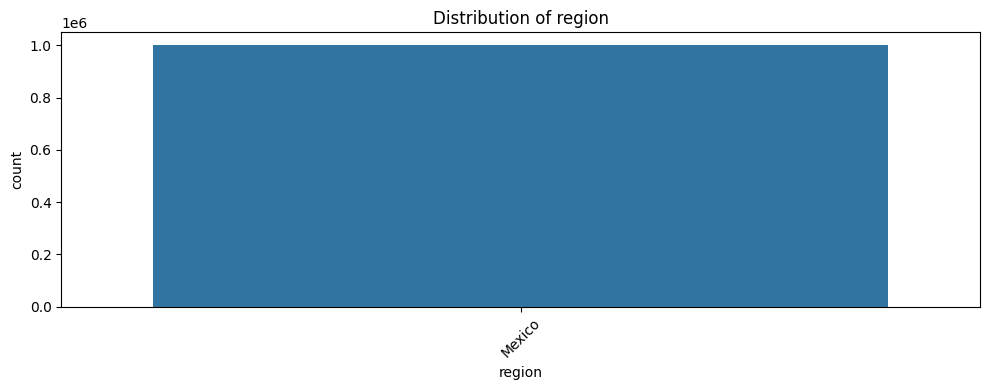

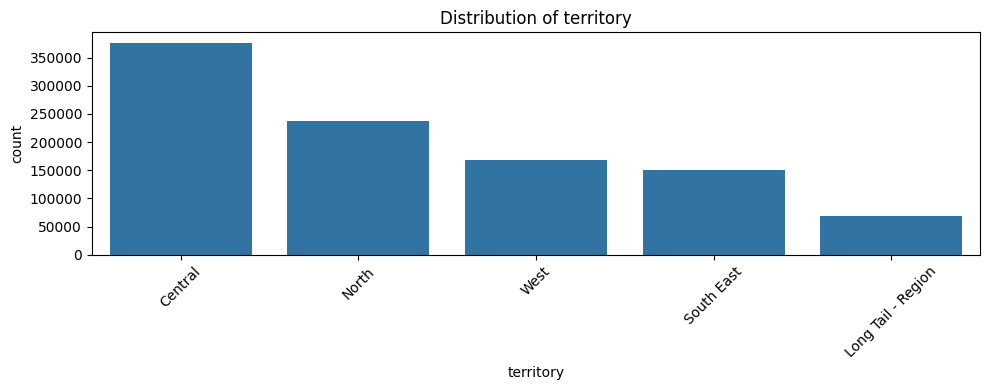

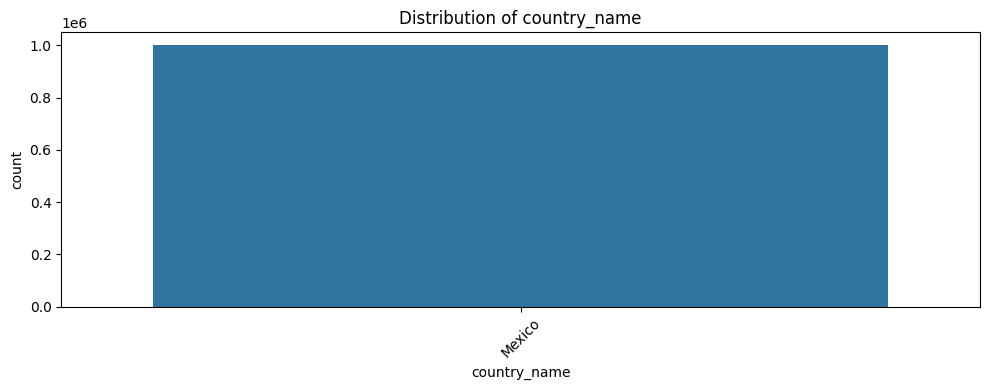

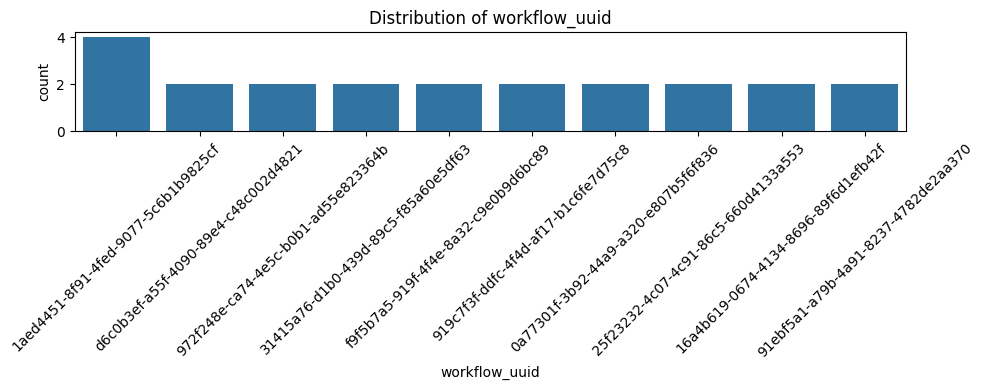

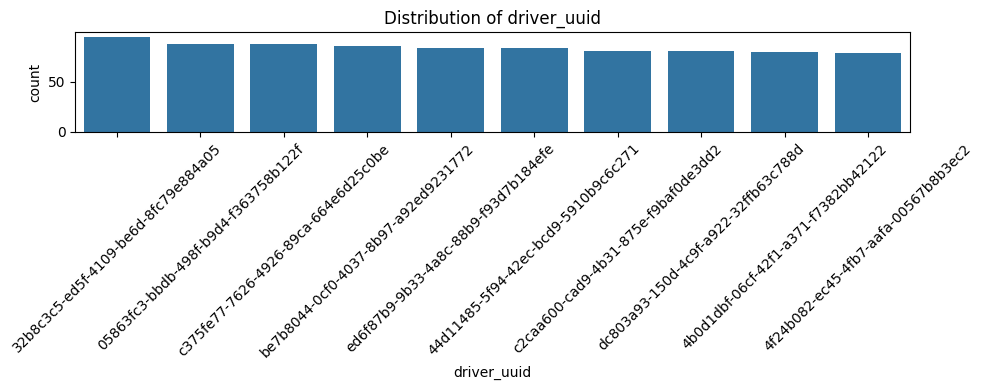

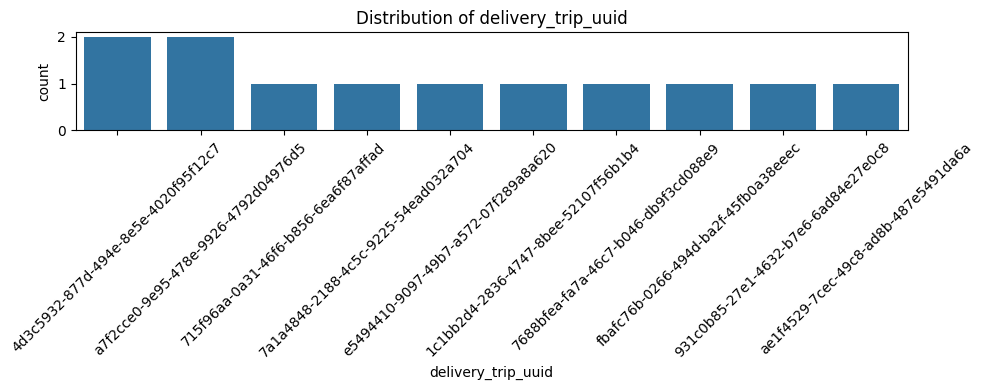

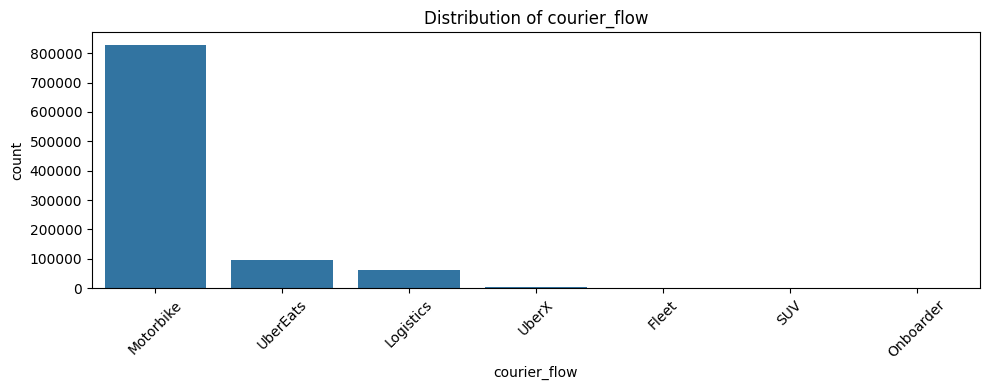

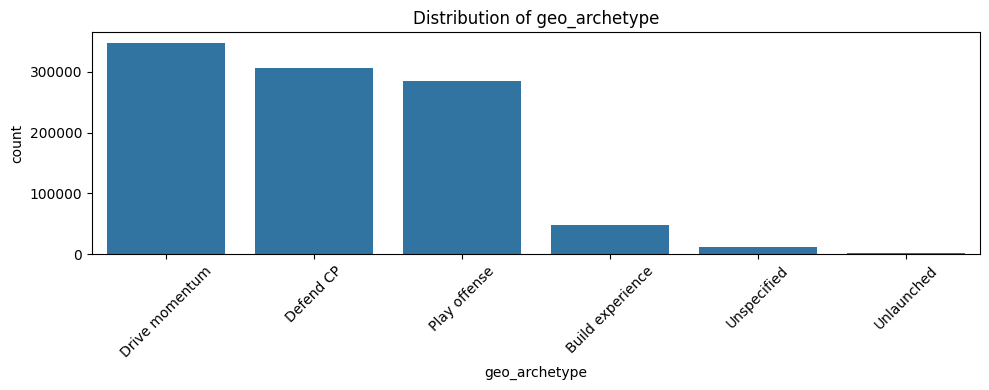

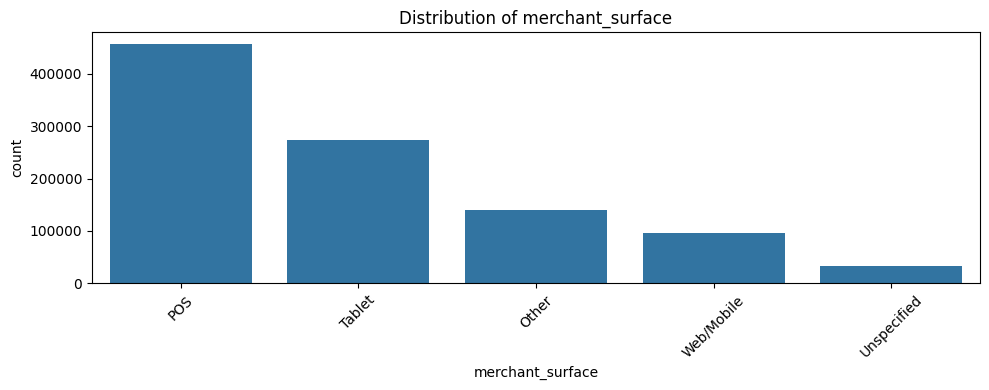

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df_converted.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_converted, x=col, order=df_converted[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


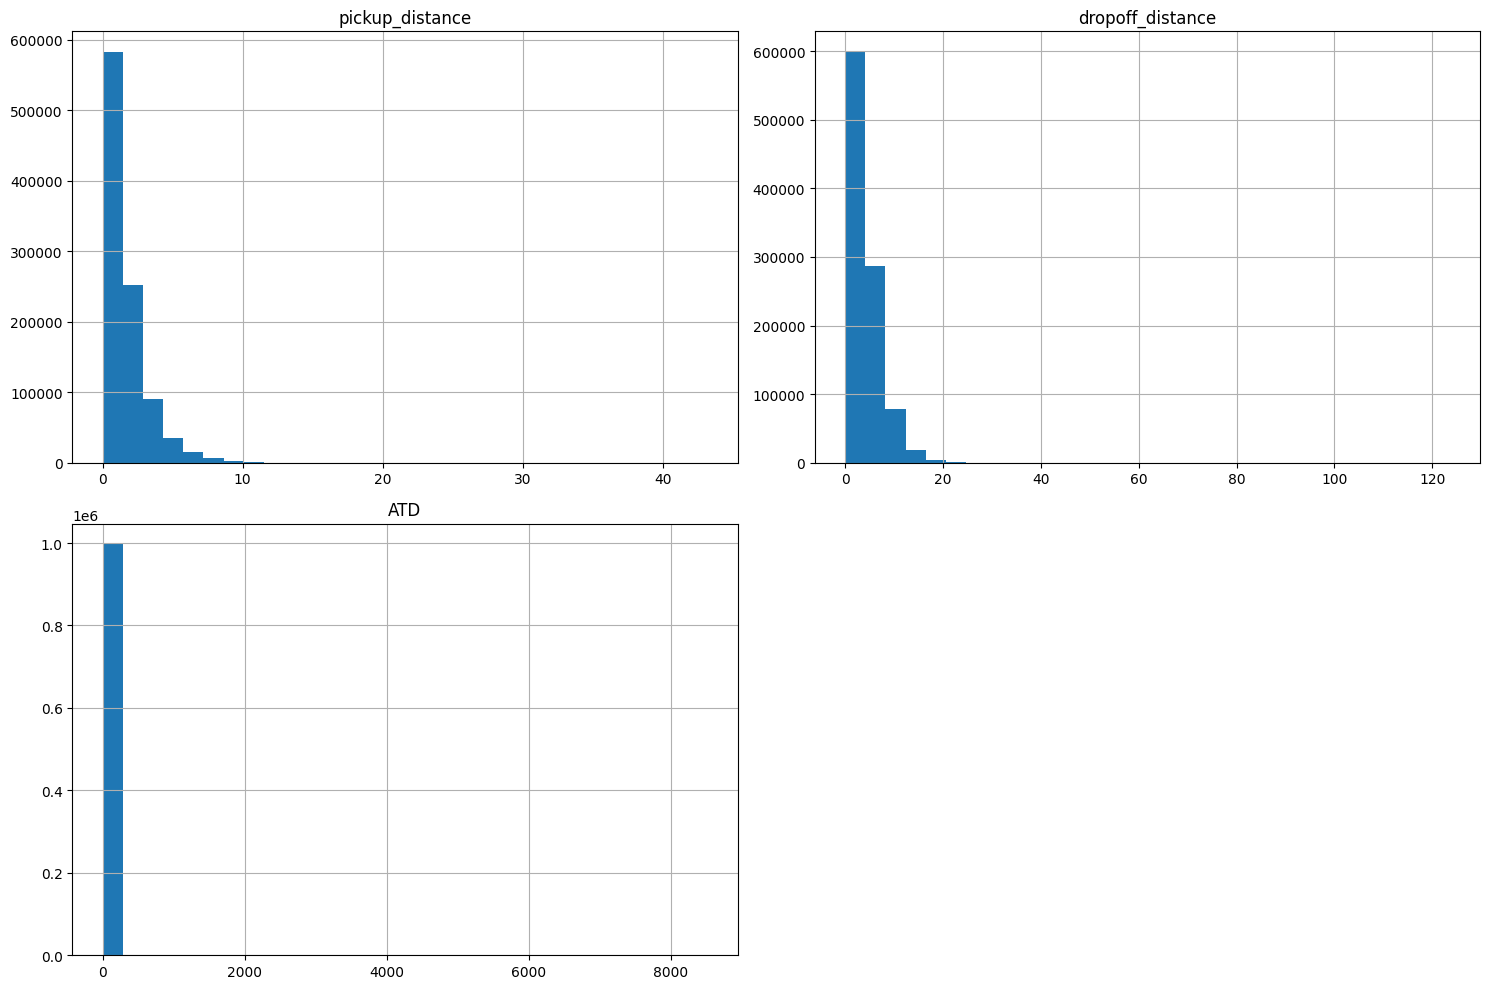

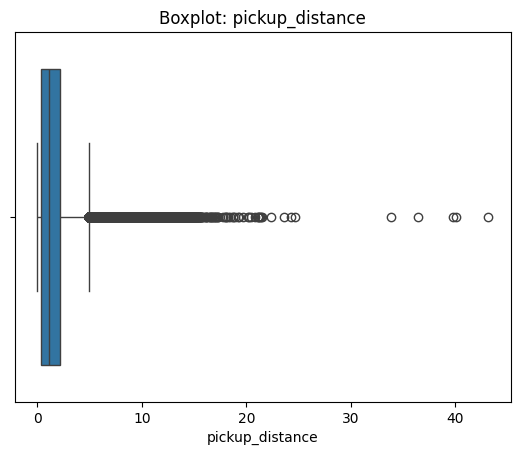

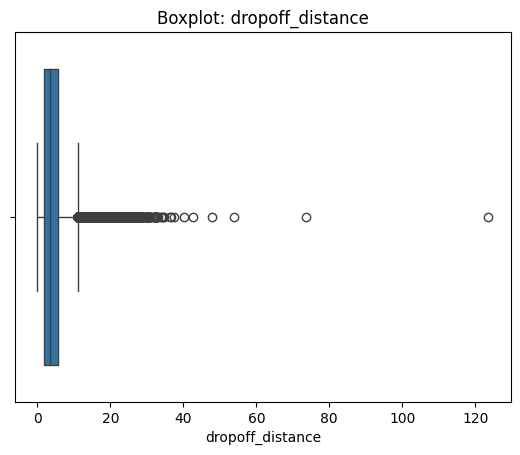

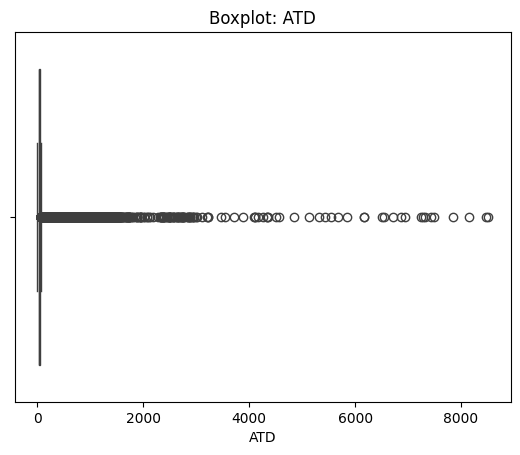

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas
df_converted.select_dtypes(include='number').hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
for col in df_converted.select_dtypes(include='number'):
    sns.boxplot(x=df_converted[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


Observations:

    * Categorical columns are also skewed

Conclusions: 

1. Convert "\N" values to null, then drop them. They represent only 1.5% of the data
2. Convert timestamp columns to date since they are as object
3. Also convert distance columns to float
4. Convert one timestamp column to date so it can be our column time to aggregate the data at different periods of time
5. Rest of categorical columns need to be encoded
6. Create new features that can be helpful in the dashboard and model as well
7. For modeling 
    * we need to handle outliers by standardization
    * For id columns we can just drop them since they don't aport anything to the model